In [1]:
import sys
sys.path.append('../')

from cube import Cube
from mcts import MCTS
from astar import Astar

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
max_scramble_depth = 7
num_per_scramble_depth = 10
num_iterations_per_solve = 10_000

# MCTS or Astar
# algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
# algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')

# MCTS

In [15]:
import pickle

algorithm_mcts = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
percentages_mcts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    nr_solved = 0
    for _ in tqdm(range(num_per_scramble_depth)):
        cube = Cube()
        cube.scramble(scramble_depth)
        solution = algorithm_mcts.solve(cube, num_iterations_per_solve)
        if solution is not None:
            nr_solved += 1
    percentages_mcts.append(nr_solved / num_per_scramble_depth)

with open('experiment_results/percentages_mcts.pickle', 'wb') as f_resnet:
    pickle.dump(percentages_mcts, f_resnet, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 10/10 [02:12<00:00, 13.25s/it]


Text(0.5, 1.0, 'Percentage of cubes solved using MCTS ADI.')

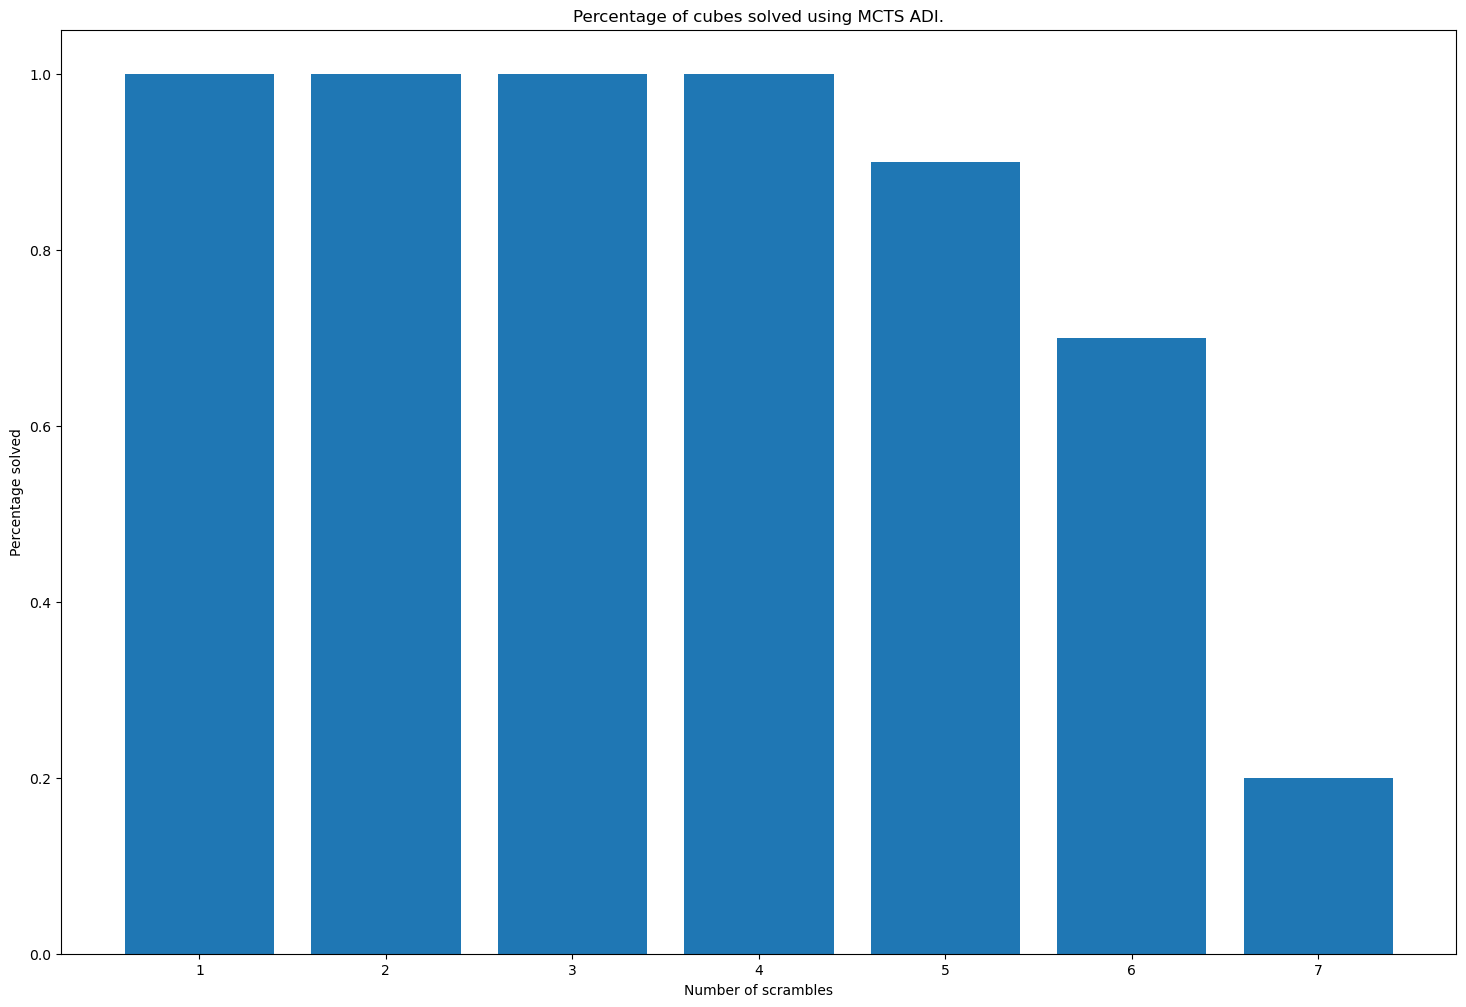

In [17]:
import pickle
import numpy as np

if not 'percentages_mcts' in globals():
    with open('experiment_results/percentages_mcts.pickle', 'rb') as f_mcts:
        percentages_resnet = pickle.load(f_mcts)

    
plt.figure(figsize=(18,12))
plt.bar(range(1, max_scramble_depth + 1), percentages_mcts)
plt.xlabel("Number of scrambles")
plt.ylabel("Percentage solved")
plt.title("Percentage of cubes solved using MCTS ADI.")

# A*

In [3]:
import pickle

algorithm_resnet = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')
percentages_resnet = []

for scramble_depth in range(1, max_scramble_depth + 1):
    nr_solved = 0
    for _ in tqdm(range(num_per_scramble_depth)):
        cube = Cube()
        cube.scramble(scramble_depth)
        solution = algorithm_resnet.solve(cube, num_iterations_per_solve)
        if solution is not None:
            nr_solved += 1
    percentages_resnet.append(nr_solved / num_per_scramble_depth)

with open('experiment_results/percentages_resnet.pickle', 'wb') as f_resnet:
    pickle.dump(percentages_resnet, f_resnet, protocol=pickle.HIGHEST_PROTOCOL)
    
plt.bar(range(1, max_scramble_depth + 1), percentages_resnet)

100%|██████████| 10/10 [20:24<00:00, 122.41s/it]


100%|██████████| 10/10 [10:03<00:00, 60.38s/it]


<BarContainer object of 7 artists>

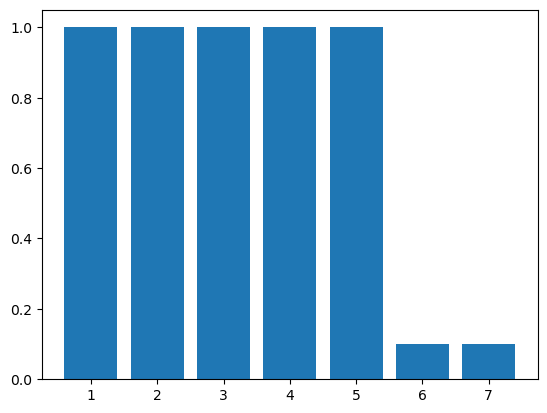

In [3]:
import pickle

algorithm_normal = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'normal')
percentages_normal = []

for scramble_depth in range(1, max_scramble_depth + 1):
    nr_solved = 0
    for _ in tqdm(range(num_per_scramble_depth)):
        cube = Cube()
        cube.scramble(scramble_depth)
        solution = algorithm_normal.solve(cube, num_iterations_per_solve)
        if solution is not None:
            nr_solved += 1
    percentages_normal.append(nr_solved / num_per_scramble_depth)

with open('experiment_results/percentages_normal.pickle', 'wb') as f_normal:
    pickle.dump(percentages_normal, f_normal, protocol=pickle.HIGHEST_PROTOCOL)

plt.bar(range(1, max_scramble_depth + 1), percentages_normal)

<BarContainer object of 7 artists>

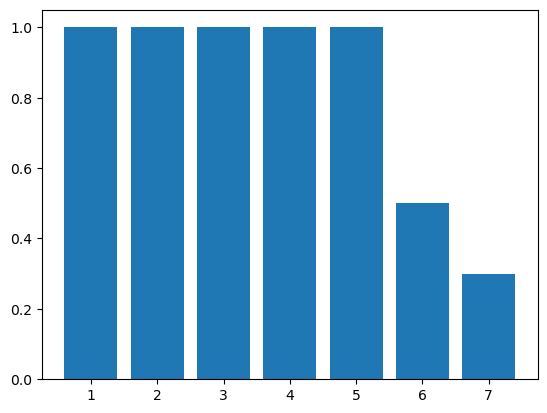

In [4]:
plt.bar(range(1, max_scramble_depth + 1), percentages)

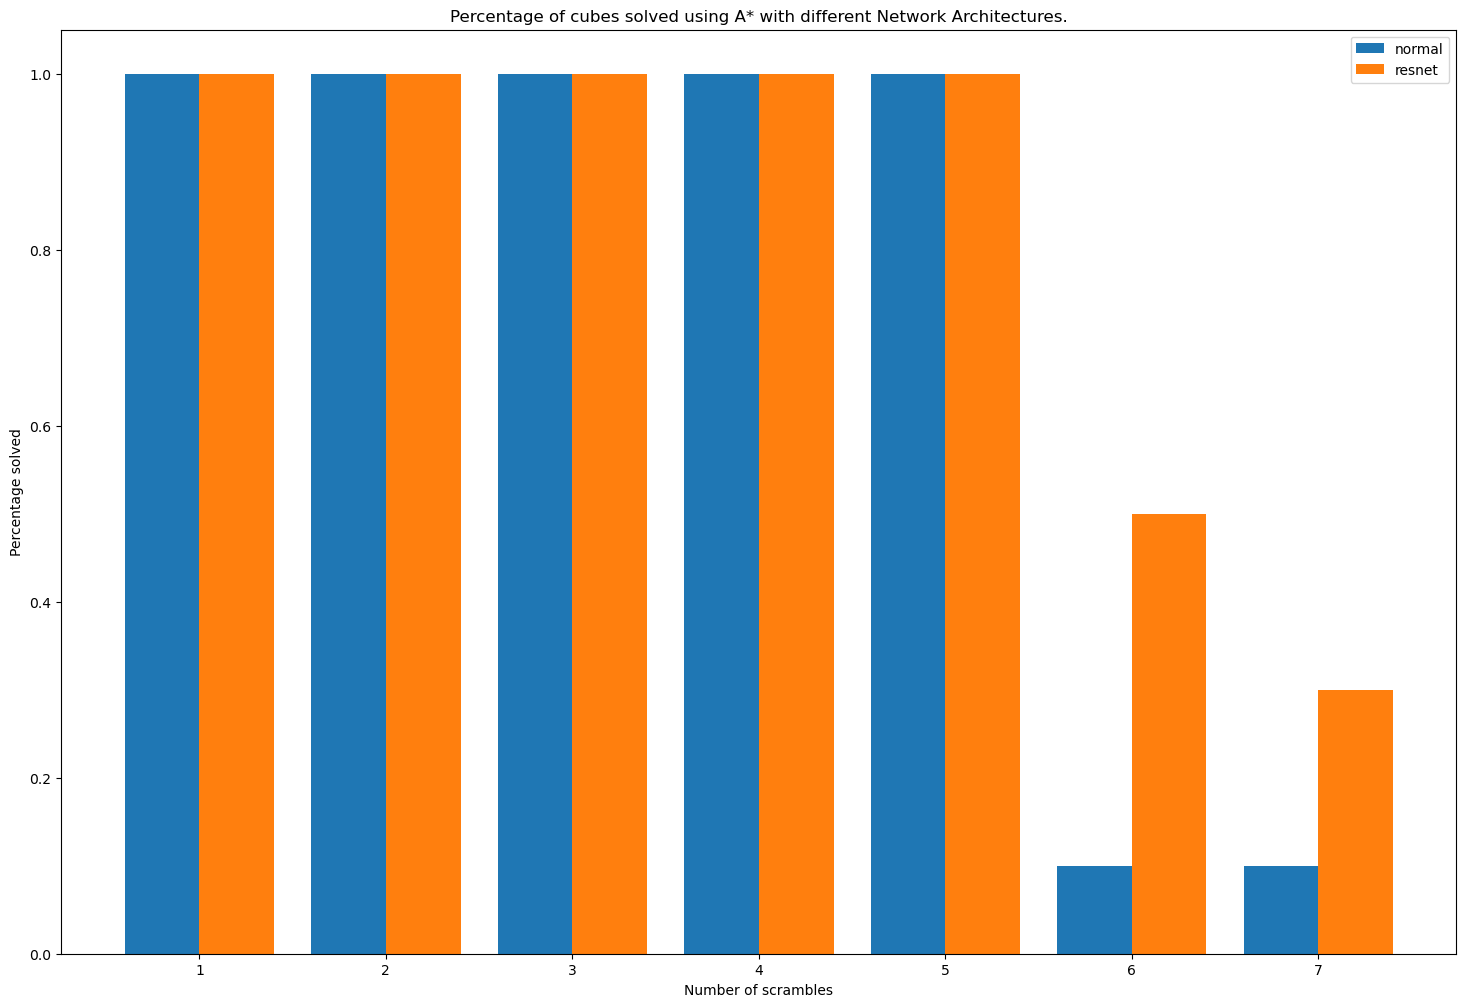

In [14]:
import pickle
import numpy as np

if not 'percentages_normal' in globals():
    with open('experiment_results/percentages_normal.pickle', 'rb') as f_normal:
        percentages_normal = pickle.load(percentages_normal)

if not 'percentages_resnet' in globals():
    with open('experiment_results/percentages_resnet.pickle', 'rb') as f_resnet:
        percentages_resnet = pickle.load(percentages_resnet)
    
plt.figure(figsize=(18,12))
plt.bar(np.arange(1, max_scramble_depth + 1) - 0.2, percentages_normal, 0.4, label='normal')
plt.bar(np.arange(1, max_scramble_depth + 1) + 0.2, percentages_resnet, 0.4, label='resnet')
plt.xlabel("Number of scrambles")
plt.ylabel("Percentage solved")
plt.title("Percentage of cubes solved using A* with different Network Architectures.")
plt.legend()